     Train size |   pdq |     Score   | Rank
##### 0.66      311 ==> Test RMSE: 3226.437  =4
##### 0.68      411 ==> Test RMSE: 3237.796  =5
##### 0.66      511 ==> Test RMSE: 3221.934  =3
##### 0.64      511 ==> Test RMSE: 3187.563  =1
##### 0.62      511 ==> Test RMSE: 3402.709  =6
##### 0.65      511 ==> Test RMSE: 3198.165  =2

auto-arima score: RMSE 3197.6141903054377 : Train == 64%,   pdq == 101

best arima score: RMSE: 3187.563 :  Train == 64%,           pdq == 511

In [10]:
import pandas as pd

import statsmodels.api as sm

import warnings

In [5]:
df = pd.read_csv('../datasets/data.csv', index_col=['date'], parse_dates=['date'])

In [6]:
df.head()

,work,income
date,,
2021-09-30,2,2100
2021-10-03,1,3600
2021-10-04,1,4000
2021-10-05,1,7900
2021-10-06,1,7500


In [8]:
p, d, q = 1, 0, 1

In [11]:
model=sm.tsa.statespace.SARIMAX(df['income'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))

c:\Users\Sheasier Shisia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sheasier Shisia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
model=model.fit()

c:\Users\Sheasier Shisia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             income   No. Observations:                  192
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -1837.689
Date:                            Tue, 24 Jan 2023   AIC                           3685.378
Time:                                    15:48:41   BIC                           3701.666
Sample:                                         0   HQIC                          3691.975
                                            - 192                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.007    145.832      0.000       0.986       1.013
ma.L1         -0.9272      0.034   

In [14]:
predictions = model.predict(len(df), len(df)+20)

c:\Users\Sheasier Shisia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [15]:
print(predictions)

192    7059.282427
193    7206.575336
194    7147.296128
195    7117.623014
196    7094.910103
197    7115.851674
198    7065.416190
199    7087.452156
200    7149.643843
201    7095.614093
202    7077.003501
203    7101.609105
204    7034.873559
205    7179.404086
206    7121.178656
207    7092.012404
208    7069.677790
209    7090.191217
210    7040.646200
211    7062.233835
212    7123.235384
Name: predicted_mean, dtype: float64


<AxesSubplot: xlabel='date'>

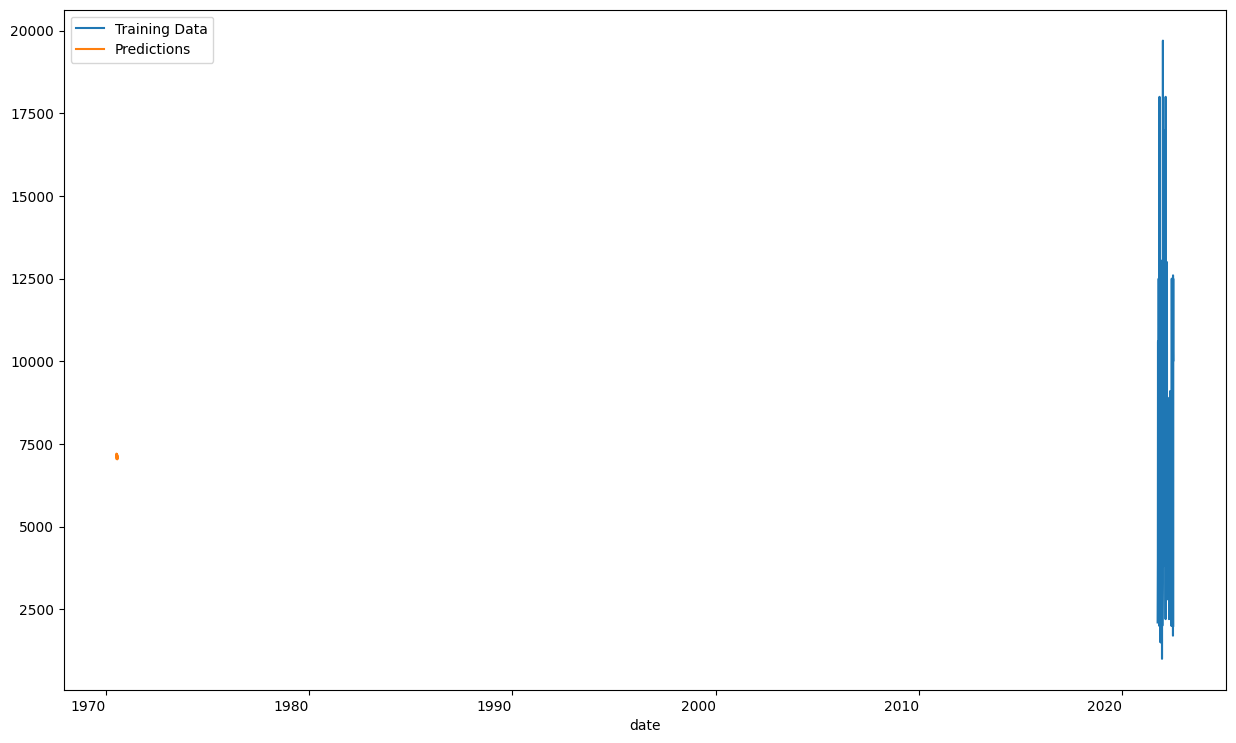

In [16]:
df["income"].plot(legend=True, label="Training Data", figsize=(15, 10))

predictions.plot(legend=True, label="Predictions")